<a href="https://colab.research.google.com/github/mbenitah/IFT6135_HW1/blob/master/IFT6135_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Loading
import torch
from torchvision import datasets, transforms, utils

# ---- Visualizing
import matplotlib.pyplot as plt
import numpy as np



#Loading Data

In [0]:
BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
#     transforms.Normalize((0.1307,), (0.3081,))
    ])

transform = transforms.Compose(
    [transforms.ToTensor(),
#     transforms.Normalize((0.1307,), (0.3081,))
    ])

trainset = datasets.MNIST(root='../data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='../data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

 

    

## Visualizing some samples

Labels:  tensor([2, 4, 8, 9])
Batch shape:  torch.Size([4, 1, 28, 28])


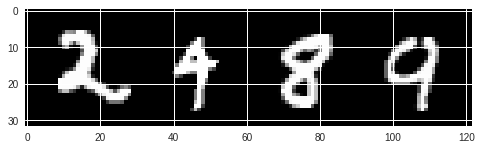

In [52]:
# functions to show an image

def show_batch(batch):
    im = utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)    
    


In [0]:
    
def imshow(img):
    img = torch.squeeze(img)
    img = img * 255     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
for batch_idx, (data, target) in enumerate(trainloader):
    data, target = data.to(device), target.to(device)

In [35]:
print(data.shape)
print(trainloader.batch_size)

torch.Size([4, 1, 28, 28])
4


In [36]:
print(data)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
    

In [14]:
print(target)

tensor([2], device='cuda:0')


In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
print(device)

cuda
